In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [3]:
rawdata=pd.read_csv('real_estate_priceSYV.csv')

In [4]:
data=rawdata.copy()

In [5]:
data.head()

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view


In [6]:
data['view']=data['view'].map({'No sea view':0,'Sea view':1})

In [8]:
y=data['price']
x1=data.iloc[:,1:4]

In [10]:
x1
x=sm.add_constant(x1)

In [11]:
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     335.2
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           1.02e-50
Time:                        18:24:57   Log-Likelihood:                -1144.6
No. Observations:                 100   AIC:                             2297.
Df Residuals:                      96   BIC:                             2308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.398e+06   9.94e+05     -5.431      0.000   -7.37e+06   -3.43e+06
size         223.0316      7.838     28.455      0.000     207.473     238.590
year        2718.9489    493.502      5.510      0.000    1739.356    3698.542
view        5.673e+04   4627.695     12.258      0.000    4.75e+04    6.59e+04
==============================================================================
Omnibus:                       29.224   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.957
Skew:                           1.088   Prob(JB):                     7.85e-15
Kurtosis:                       6.295   Cond. No.                     9.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

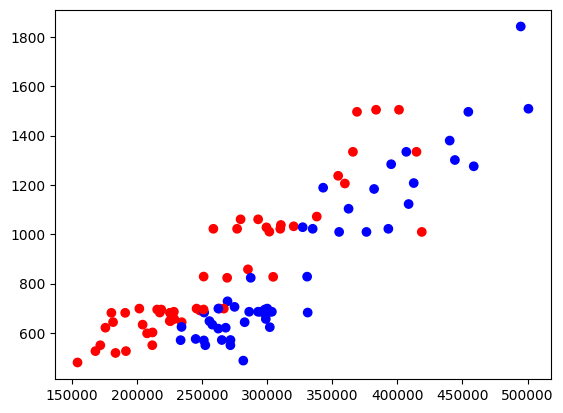

In [15]:
plt.scatter(y,data['size'],c=data['view'],cmap='bwr_r')

In [16]:
pdata=pd.DataFrame({'const':1,'size':[1220,584,902],'view':[0,0,1],'year':[1920,2020,1990]})

pdata

,const,size,view,year
0,1,1220,0,1920
1,1,584,0,2020
2,1,902,1,1990


In [18]:
pdata=pdata[['const','size','year','view']]
pdata

,const,size,year,view
0,1,1220,1920,0
1,1,584,2020,0
2,1,902,1990,1


In [22]:
predic=model.predict(pdata)
predic.rename(index={1:'a',2:'b'})

0     94566.260341
a    224613.039239
b    270694.647362
dtype: float64

In [26]:
pdataset=pd.DataFrame({'predict':predic})
predataset =pdata.join(pdataset)
predataset

,const,size,year,view,predict
0,1,1220,1920,0,94566.260341
1,1,584,2020,0,224613.039239
2,1,902,1990,1,270694.647362
